# COURSE: Master statistics and machine learning: Intuition, Math, code
##### COURSE URL: udemy.com/course/statsml_x/?couponCode=202006 
## SECTION: Descriptive statistics
### VIDEO: Computing central tendency
#### TEACHER: Mike X Cohen, sincxpress.com

In [1]:
# import libraries
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

In [2]:
## create some data distributions

# the distributions
N = 10001   # number of data points
nbins = 30  # number of histogram bins

rng = np.random.default_rng()
d1 = rng.standard_normal(N) - 1
d2 = 3*rng.standard_normal(N)
d3 = rng.standard_normal(N) + 1

# need their histograms
# reminder - this done to plot a line through the centers of bins
y1, x1 = np.histogram(d1, nbins)
x1 = (x1[1:]+x1[:-1])/2

y2, x2 = np.histogram(d2, nbins)
x2 = (x2[1:]+x2[:-1])/2

y3, x3 = np.histogram(d3, nbins)
x3 = (x3[1:]+x3[:-1])/2

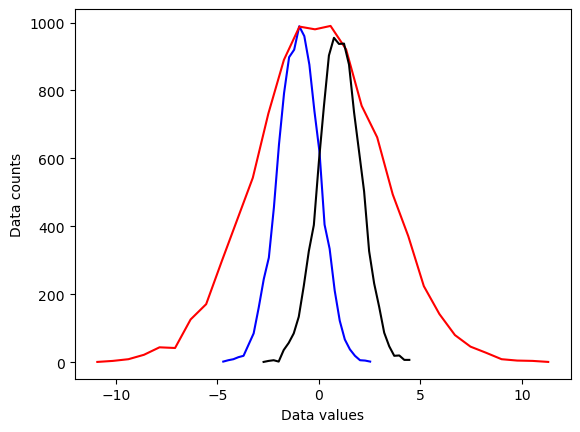

In [3]:
# plot them
plt.plot(x1, y1, 'b')
plt.plot(x2, y2, 'r')
plt.plot(x3, y3, 'k')
plt.xlabel('Data values')
plt.ylabel('Data counts')
plt.show()

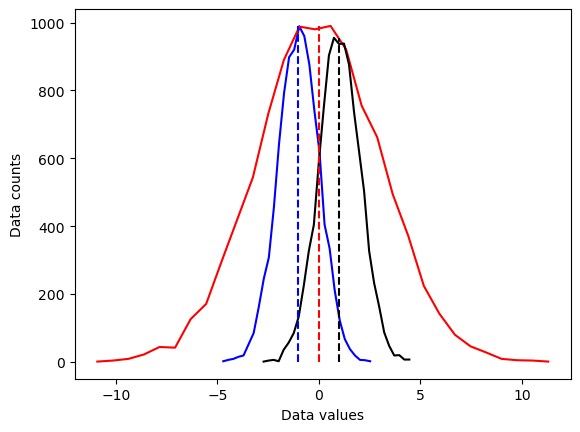

In [4]:
## overlay the mean

# compute the means
mean_d1 = np.sum(d1) / len(d1)  # mean, but by hand
mean_d2 = np.mean(d2)
mean_d3 = np.mean(d3)

# plot them
plt.plot(x1, y1, 'b', x2, y2, 'r', x3, y3, 'k')
plt.plot([mean_d1, mean_d1], [0, max(y1)], 'b--')
plt.plot([mean_d2, mean_d2], [0, max(y2)], 'r--')
plt.plot([mean_d3, mean_d3], [0, max(y3)], 'k--')

plt.xlabel('Data values')
plt.ylabel('Data counts')
plt.show()

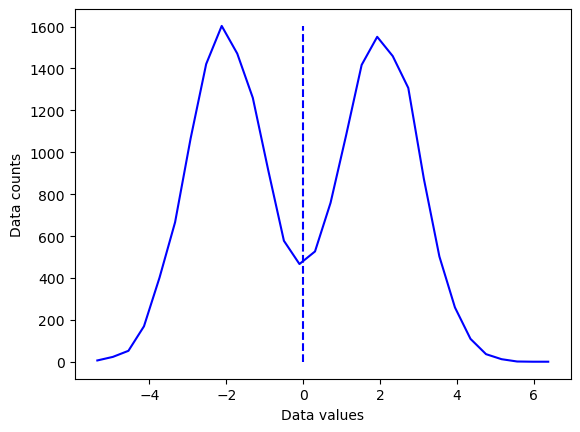

In [10]:
## "failure" of the mean

# new dataset of distribution combinations
d4 = np.hstack((rng.standard_normal(N)-2, rng.standard_normal(N)+2))
# and its histogram
[y4, x4] = np.histogram(d4, nbins)
x4 = (x4[:-1]+x4[1:])/2
# and its mean
mean_d4 = np.mean(d4)

plt.plot(x4, y4, 'b')
plt.plot([mean_d4, mean_d4],[0, max(y4)], 'b--')
plt.xlabel('Data values')
plt.ylabel('Data counts')
plt.show()

In [11]:
## median

# create a log-normal distribution
shift = 0
stretch = 0.7
n = 2000
nbins = 50

# generate data
data = stretch*rng.standard_normal(n) + shift
data = np.exp(data)

# and its histogram
y, x = np.histogram(data, nbins)
x = (x[:-1]+x[1:])/2

# compute mean and median
datamean = np.mean(data)
datamedian = np.median(data)

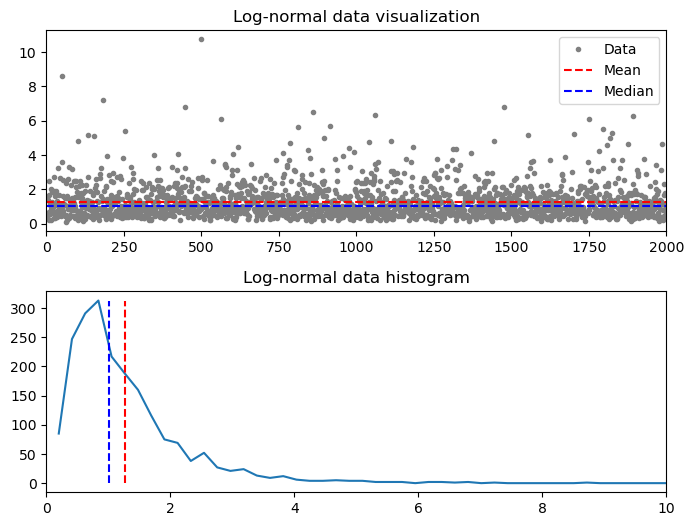

In [17]:
# plot data
fig, ax = plt.subplots(2, 1, figsize=(8, 6))
fig.subplots_adjust(hspace=0.3)

ax[0].plot(data, '.', color=[0.5, 0.5, 0.5], label='Data')
ax[0].plot([0, n], [datamean, datamean], 'r--', label='Mean')
ax[0].plot([0, n], [datamedian, datamedian], 'b--', label='Median')
ax[0].set(title='Log-normal data visualization', xlim=[0, 2000])
ax[0].legend()

ax[1].plot(x, y)
ax[1].plot([datamean, datamean], [0, max(y)], 'r--')
ax[1].plot([datamedian, datamedian], [0, max(y)], 'b--')
ax[1].set(title='Log-normal data histogram', xlim=[0, 10])
plt.show()

In [29]:
## mode

data = np.round(rng.standard_normal(10))
uniq_data = np.unique(data)

for i in range(len(uniq_data)):
    print(f'{uniq_data[i]} appears {np.sum(data==uniq_data[i])} times.')

print(' ')
# print('The modal value is %g'%stats.mode(data)[0][0])
print(f'The modal value is {stats.mode(data, axis=None, keepdims=False)[0]}')

-2.0 appears 1 times.
-1.0 appears 3 times.
0.0 appears 2 times.
1.0 appears 3 times.
2.0 appears 1 times.
 
The modal value is -1.0


In [24]:
# playing with stats.mode

print(data)  # what are we dealing with
mode = stats.mode(data, axis=None, keepdims=False)
print(mode, type(mode))

[ 0. -1.  1. -1. -0. -2.  0.  1. -2. -0.]
ModeResult(mode=0.0, count=4) <class 'scipy.stats._stats_py.ModeResult'>
